In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [10]:
ssc=ctrl.Antecedent(np.arange(0,1.1,0.01),'Sentiment Score')
eint=ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'Emotional Intensity')
npwr=ctrl.Antecedent(np.arange(0,10.1,0.1),'Number of Positive Words in Review')
nnwr=ctrl.Antecedent(np.arange(0,10.1,0.1),'Number of Negative Words in Review')

rsc=ctrl.Consequent(np.arange(0,100.1,0.1),'Review Sentiment Classification')

In [11]:
ssc['l']=fuzz.gaussmf(ssc.universe,0,0.2)
ssc['m']=fuzz.gaussmf(ssc.universe,0.5,0.2)
ssc['h']=fuzz.gaussmf(ssc.universe,1,0.2)

In [12]:
eint['l']=fuzz.gaussmf(eint.universe,0,25)
eint['m']=fuzz.gaussmf(eint.universe,50,25)
eint['h']=fuzz.gaussmf(eint.universe,100,25)

In [13]:
npwr['f']=fuzz.gaussmf(npwr.universe,1,0.5)
npwr['s']=fuzz.gaussmf(npwr.universe,4.5,1)
npwr['m']=fuzz.gaussmf(npwr.universe,7,1.5)

In [14]:
nnwr['f']=fuzz.gaussmf(nnwr.universe,1,0.5)
nnwr['s']=fuzz.gaussmf(nnwr.universe,4.5,1)
nnwr['m']=fuzz.gaussmf(nnwr.universe,7,1.5)

In [15]:
rsc['n']=fuzz.gaussmf(rsc.universe,0,25)
rsc['m']=fuzz.gaussmf(rsc.universe,50,25)
rsc['p']=fuzz.gaussmf(rsc.universe,100,25)

In [16]:
rule1=ctrl.Rule(ssc['l']&eint['h'],rsc['n'])
rule2=ctrl.Rule(ssc['l']&eint['l'],rsc['m'])
rule3=ctrl.Rule(ssc['m']&eint['m'],rsc['m'])
rule4=ctrl.Rule(ssc['h']&eint['h'],rsc['p'])

In [17]:
rule5=ctrl.Rule(npwr['m']&nnwr['f'],rsc['p'])
rule6=ctrl.Rule(npwr['f']&nnwr['m'],rsc['n'])
rule7=ctrl.Rule(npwr['s']&nnwr['s'],rsc['m'])

In [18]:
rule8=ctrl.Rule(ssc['l']&eint['h']&nnwr['m'],rsc['n'])
rule9=ctrl.Rule(ssc['m']&eint['m']&npwr['m'],rsc['m'])
rule10=ctrl.Rule(ssc['h']&eint['h']&npwr['m'],rsc['p'])

50.00000000000067


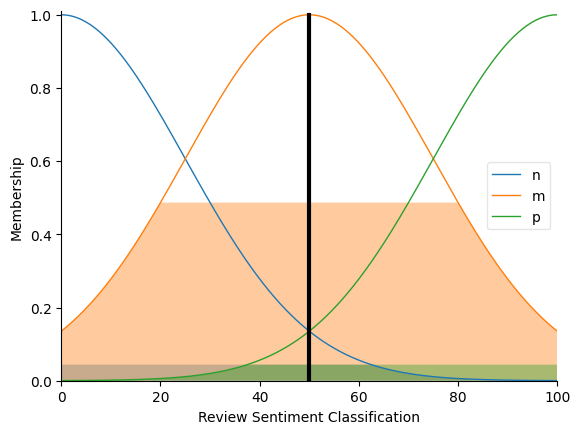

In [19]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Sentiment Score']=0.5
tipping.input['Emotional Intensity']=80
tipping.input['Number of Positive Words in Review']=3
tipping.input['Number of Negative Words in Review']=4
tipping.compute()
print(tipping.output['Review Sentiment Classification'])
rsc.view(sim=tipping)